In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [4]:
train_dataset.drop(['Unnamed: 0', 'NU_ANO'], axis=1, inplace=True)
train_dataset.describe()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,1.000000,0.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,2.000000,0.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,2.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,4.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
test_dataset.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,1426.000000,1426.000000,4570.000000,...,3458.000000,3400.000000,4570.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,31.029322,21.545295,2.176586,1.046827,1.767615,2.172867,1.357987,1.166199,2.286115,0.002188,...,528.615818,516.102471,0.609190,1.090000,118.988824,111.599118,106.130882,112.402941,76.376471,525.498235
std,9.901375,6.790798,0.996656,0.245769,0.871374,3.250585,0.567280,0.546511,0.721239,0.046732,...,73.278207,69.141624,0.487985,0.668384,29.067885,33.150519,33.553963,32.801291,43.295267,151.640060
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,479.525000,469.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,531.200000,521.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,580.975000,564.825000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,63.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,750.700000,730.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,960.000000


In [7]:
aux_dt = pd.DataFrame({'columns': train_dataset.columns,
                       'type': train_dataset.dtypes,
                       'nulls': train_dataset.isnull().sum()})
aux_dt.sort_values('nulls', ascending=False)

,columns,type,nulls
SG_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,object,12092
NO_ENTIDADE_CERTIFICACAO,NO_ENTIDADE_CERTIFICACAO,object,12092
CO_UF_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,float64,12092
Q041,Q041,float64,10792
CO_ESCOLA,CO_ESCOLA,float64,9448
...,...,...,...
IN_MOBILIARIO_OBESO,IN_MOBILIARIO_OBESO,int64,0
IN_LAMINA_OVERLAY,IN_LAMINA_OVERLAY,int64,0
IN_PROTETOR_AURICULAR,IN_PROTETOR_AURICULAR,int64,0
IN_MEDIDOR_GLICOSE,IN_MEDIDOR_GLICOSE,int64,0


In [13]:
corr = train_dataset.corr().abs().sort_values('IN_TREINEIRO', ascending=False)
most_corr_columns = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ESCOLA']

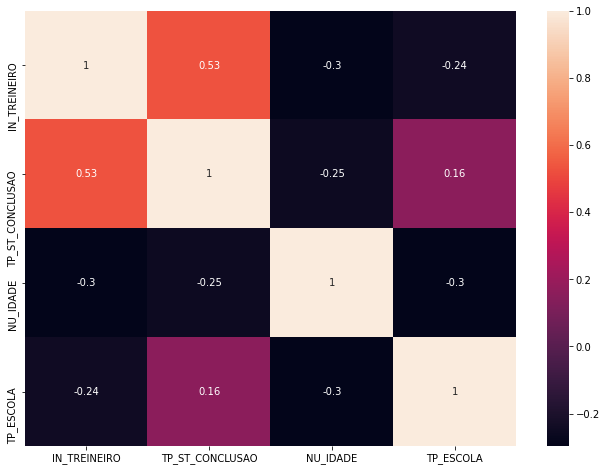

In [16]:
corr_dataset = train_dataset[most_corr_columns]
corr = corr_dataset.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [19]:
y_train = train_dataset['IN_TREINEIRO']
x_train = train_dataset[['TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']]
x_test = test_dataset[['TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']]

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

In [28]:
accuracy = metrics.accuracy_score(y_train, y_pred_train)
precision =  metrics.precision_score(y_train, y_pred_train)

In [31]:
answer_dataset = pd.DataFrame({'NU_INSCRICAO': test_dataset.NU_INSCRICAO,'IN_TREINEIRO': y_pred_test})

In [32]:
answer_dataset

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [35]:
answer_dataset.to_csv('answer.csv', index=False, header=True)